<a href="https://colab.research.google.com/github/TimofeyKulakov/ML_project/blob/master/EmploymnetCOVID_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EmploymentCOVID Regression

In [0]:
CS = pd.read_excel('Employment hours_values3 (2).xlsx') # Employmenthours 2020 vs COVID-19 index
CS = CS.rename(columns={"Unnamed: 0": "Date"}, errors="raise")

In [0]:
cols = CS.columns.tolist()
models = []
scores = {}
scalar = StandardScaler()
predictions = {}

for i, column in zip([i for i in range(0, len(cols) - 1)], cols[1:]):
    e = np.array(CS[column]).reshape(-1, 1)
    a = np.array(CS["COVID"]).reshape(-1, 1)
        
    models.append((LinearRegression().fit(e, a)))

    predictions[column + '_pred'] = models[i].predict(e).reshape(len(e), 1)

    scores[column] = models[i].score(e, a)

In [146]:
scores

{'Banking': 0.9820554304822883,
 'COVID': 1.0,
 'Construction': 0.9841788593153109,
 'Metals': 0.966956029107772,
 'Mining': 0.9915718158423186,
 'Retail&Wholesale': 0.01381025994558649,
 'Transport': 0.5916060891499548}

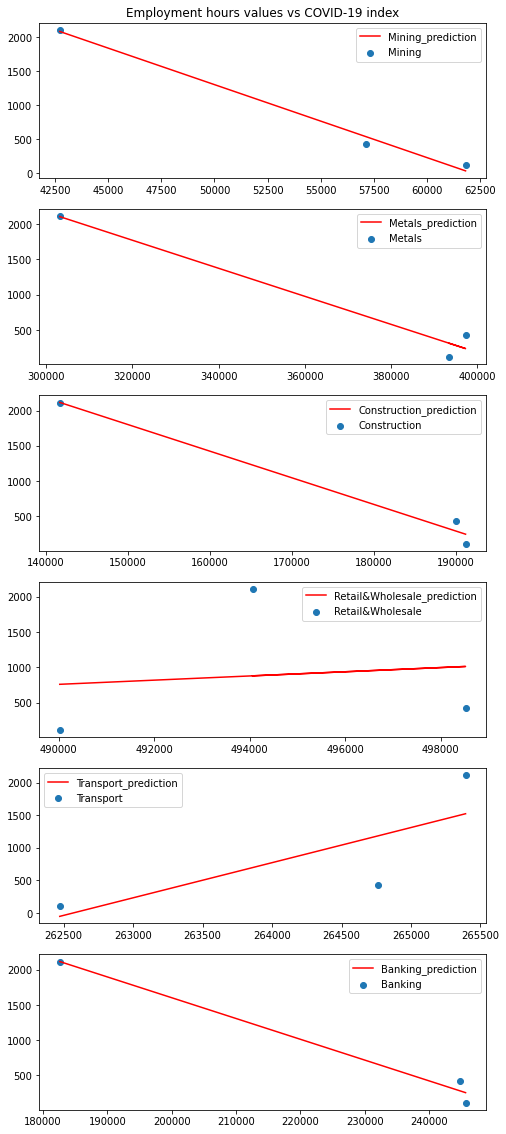

In [147]:
f, axes = plt.subplots(6, 1, sharex=False, figsize=(8, 20))
axes[0].set_title('Employment hours values vs COVID-19 index')

for i, column in zip([i for i in range(0, len(cols) - 1)], cols[1:-1]):
    axes[i].scatter(CS[column], CS["COVID"], label = column)
    axes[i].plot(CS[column], predictions[column + '_pred'], 'r', label = column + '_prediction')
    axes[i].legend()
  